https://youtu.be/o2q4QNnoShY

## ML lab 04-2: TensorFlow로 파일에서 데이타 읽어오기 (new)

In [1]:
import numpy as np

xy = np.loadtxt('./data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [24]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
tf.compat.v1.set_random_seed(777)

xy = np.loadtxt('./data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 3])
Y = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])

W = tf.Variable(tf.compat.v1.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.compat.v1.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict ={X:x_data, Y:y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, 
              "\nPrediction:\n", hy_val)
        
# Ask my score
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X:[[100, 70, 101]]}))

print('--------------------------------------------------------')
print("Other scores will be ", sess.run(hypothesis, 
                                        feed_dict={X:[[60, 70, 110], [90, 100, 80]]}))

0 Cost:  132334.8 
Prediction:
 [[-179.17189]
 [-229.71855]
 [-218.6358 ]
 [-242.0993 ]
 [-175.42757]
 [-137.06706]
 [-183.03987]
 [-137.83781]
 [-222.84178]
 [-216.4373 ]
 [-176.53632]
 [-181.90602]
 [-222.08168]
 [-179.86816]
 [-186.46063]
 [-235.57068]
 [-170.91832]
 [-218.89906]
 [-208.87569]
 [-186.03853]
 [-215.32906]
 [-218.44655]
 [-202.94348]
 [-171.71896]
 [-233.96988]]
10 Cost:  124.681366 
Prediction:
 [[160.30809]
 [178.37598]
 [183.42796]
 [195.8012 ]
 [135.81004]
 [ 92.43879]
 [144.75763]
 [105.18827]
 [158.59561]
 [136.92271]
 [139.27762]
 [129.53311]
 [193.284  ]
 [165.39485]
 [142.85669]
 [178.56422]
 [157.89398]
 [174.48776]
 [187.10156]
 [168.26315]
 [169.06767]
 [164.41835]
 [163.53609]
 [170.50679]
 [188.95119]]
20 Cost:  117.38042 
Prediction:
 [[162.60934]
 [181.21191]
 [186.18431]
 [198.82588]
 [137.9715 ]
 [ 94.07573]
 [147.03598]
 [106.89519]
 [161.29012]
 [139.47516]
 [141.47014]
 [131.73463]
 [196.10954]
 [167.7158 ]
 [145.15852]
 [181.4573 ]
 [160.09842]
 

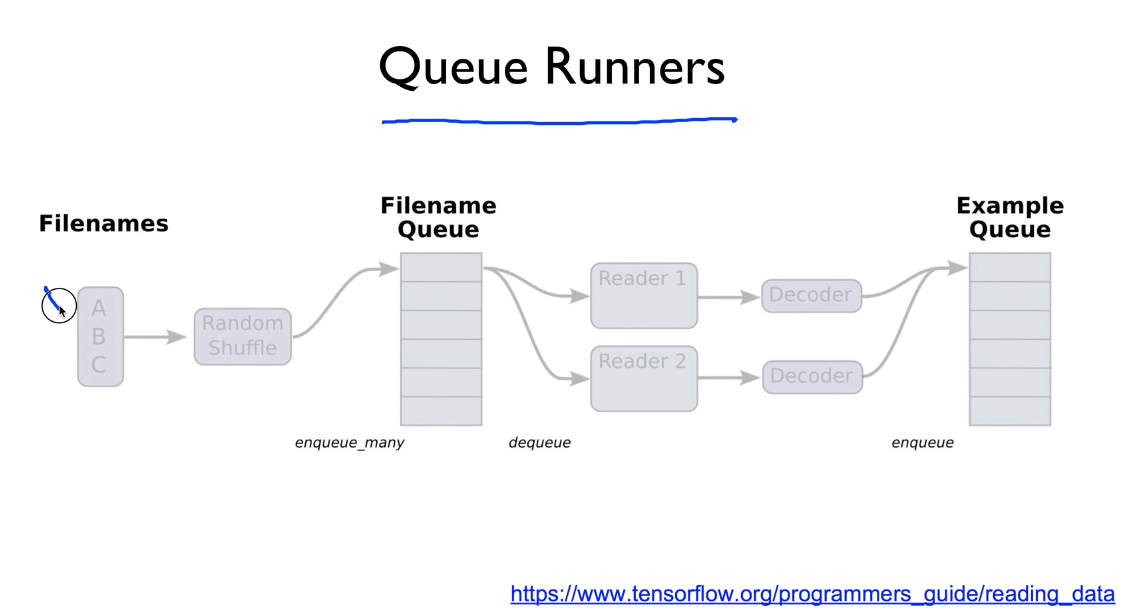

여러 개의 파일을 큐에 쌓게 되고, 이것을 Reader에 연결을 해서 데이터를 읽은 다음, 
decode 수행, 읽어온 값을 큐에 다시 넣는다. 어떤 batch만큼 학습 시키는지. 

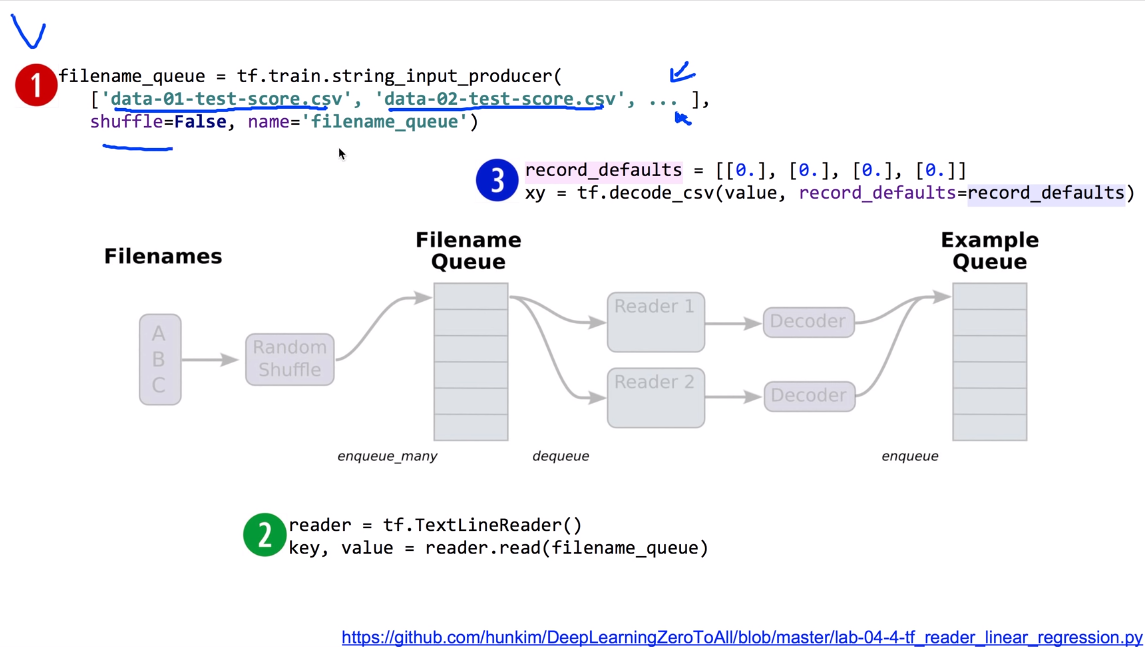
## 1. filename을 리스트한다. 
## 2. 파일 읽어올 Reader를 정의해준다. 
## 3. value를 읽어왔는데, 어떻게 파싱할 것인가를 decode_csv로 활용한다. 
필드에 해당되는 데이터 타입을 정의를 해주는 것.

In [43]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

filename_queue = tf.compat.v1.train.string_input_producer(
    ['./data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.compat.v1.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.compat.v1.decode_csv(value, record_defaults=record_defaults)
 
# collect batches of csv in 
train_x_batch, train_y_batch = \
    tf.compat.v1.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 3])
Y = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])

W = tf.Variable(tf.compat.v1.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.compat.v1.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.compat.v1.Session()
# Initializes global variables in the graph.
sess.run(tf.compat.v1.global_variables_initializer())

# Start populating the filename queue.
coord = tf.compat.v1.train.Coordinator()
threads = tf.compat.v1.train.start_queue_runners(sess=sess, coord = coord)


for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict = {X: x_batch, Y: y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, 
                  "\nPrediction:\n", hy_val)
        

coord.request_stop()
coord.join(threads)


0 Cost:  11349.349 
Prediction:
 [[54.07617 ]
 [64.042305]
 [63.722202]
 [66.39388 ]
 [51.344326]
 [33.618565]
 [45.89131 ]
 [28.60769 ]
 [56.226933]
 [45.701298]]
10 Cost:  45.385185 
Prediction:
 [[155.06506]
 [185.46448]
 [183.3377 ]
 [196.68456]
 [143.94241]
 [101.92372]
 [143.43663]
 [100.94604]
 [169.73938]
 [150.89018]]
20 Cost:  42.2627 
Prediction:
 [[155.72969]
 [186.2866 ]
 [184.1344 ]
 [197.5685 ]
 [144.56175]
 [102.4082 ]
 [144.11598]
 [101.4737 ]
 [170.53299]
 [151.66333]]
30 Cost:  41.923622 
Prediction:
 [[155.71739]
 [186.29485]
 [184.12935]
 [197.57916]
 [144.56042]
 [102.43488]
 [144.1416 ]
 [101.51665]
 [170.56584]
 [151.73158]]
40 Cost:  41.602844 
Prediction:
 [[155.70065 ]
 [186.29756 ]
 [184.11891 ]
 [197.58394 ]
 [144.55487 ]
 [102.458336]
 [144.16273 ]
 [101.55618 ]
 [170.59335 ]
 [151.79477 ]]
50 Cost:  41.285053 
Prediction:
 [[155.68394]
 [186.30022]
 [184.1085 ]
 [197.58862]
 [144.5493 ]
 [102.48165]
 [144.18375]
 [101.59555]
 [170.62071]
 [151.85764]]
60 

## 참고
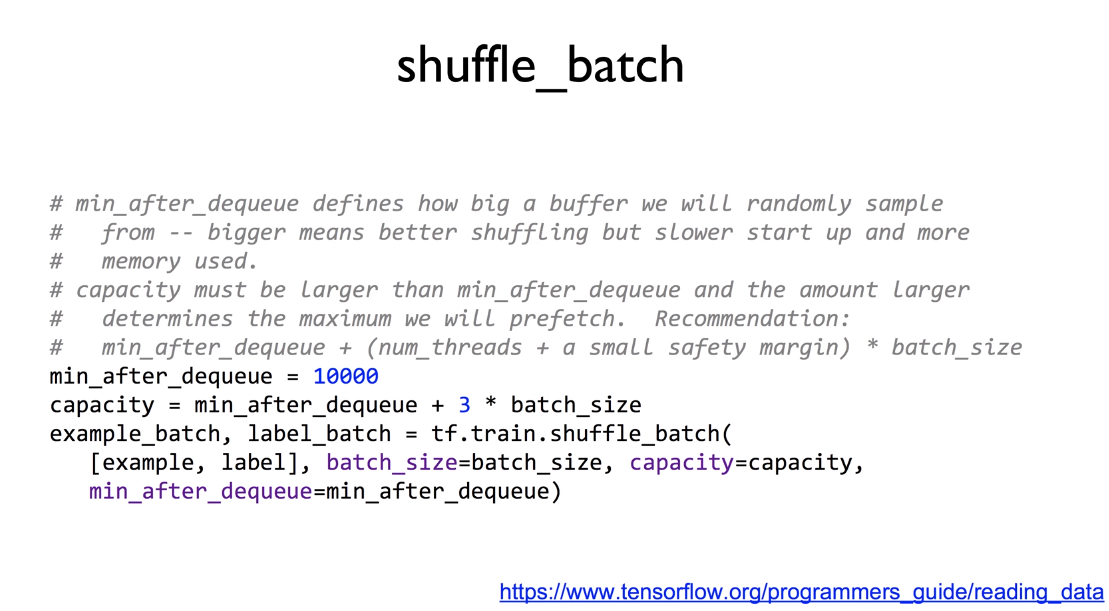